<a href="https://colab.research.google.com/github/DethSaucin/advanced-machine-learning/blob/main/sethdawson_Image_Classification_with_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Input, Dense, Flatten, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l2

In [47]:
import tensorflow as tf

class MyCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch: int, logs: dict = None) -> None:
        if logs is None:
            logs = {}

        if logs.get('accuracy') >= 0.87:
            print("\nThe Model reached 87% accuracy!! Canceling Training")
            self.model.stop_training = True

callbacks_early_stop = MyCallback()

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

print("x_train.shape:", x_train.shape)

x_train.shape: (60000, 28, 28)


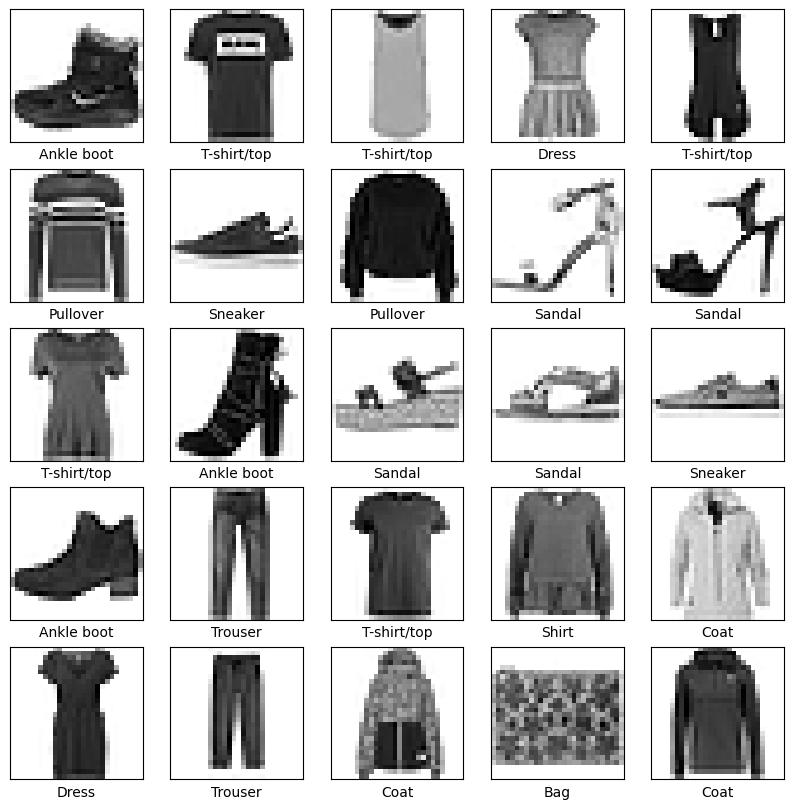

In [49]:
# List of string labels for the Fashion MNIST dataset
fashion_mnist_labels = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
                        "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

# Display the first 25 images from the training set and display the label below each image
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(fashion_mnist_labels[y_train[i]])
plt.show()

In [50]:
i = Input(shape=x_train[0].shape)
x = Flatten()(i)
x = Dense(256, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(10, activation='softmax')(x)
model = Model(i, x)

In [51]:
# Compiling the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [52]:
# Training the model
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, callbacks=[callbacks_early_stop])

Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.5797 - accuracy: 0.7916 - val_loss: 0.4428 - val_accuracy: 0.8374
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4340 - accuracy: 0.8419 - val_loss: 0.3984 - val_accuracy: 0.8536
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4001 - accuracy: 0.8536 - val_loss: 0.3717 - val_accuracy: 0.8665
Epoch 4/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3793 - accuracy: 0.8620 - val_loss: 0.3681 - val_accuracy: 0.8673
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3629 - accuracy: 0.8673 - val_loss: 0.3560 - val_accuracy: 0.8742
Epoch 6/10
1875/1875 [==============================] - ETA: 0s - loss: 0.3506 - accuracy: 0.8704
The Model reached 87% accuracy!! Canceling Training
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3506 - accuracy: 0.8704 - val_loss: 0.3644 - val_accuracy: 0

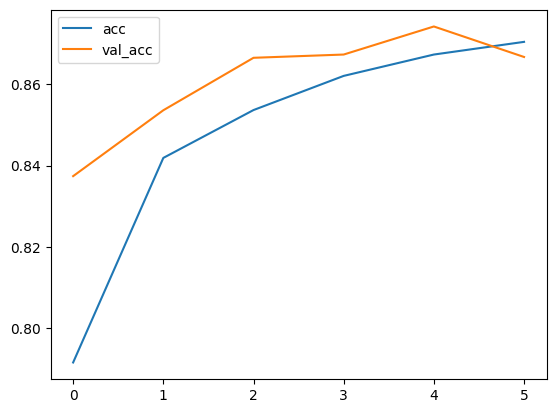

In [53]:
# Plot accuracy/iteration
plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()

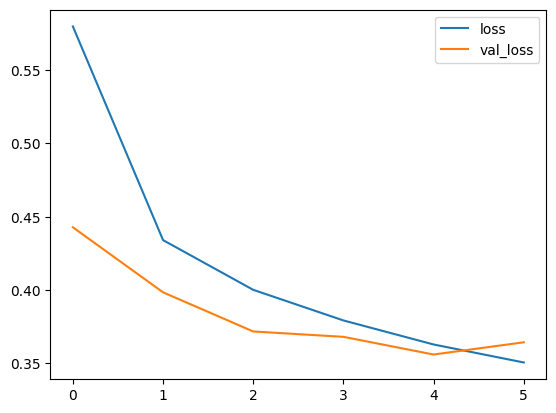

In [54]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()

In [55]:
# Evaluate the model
print(model.evaluate(x_test, y_test, verbose='False'))

[0.364376425743103, 0.8666999936103821]


In [56]:
# Predictions by the model
p_test =  np.argmax(model.predict(x_test), axis=-1)
# model.predict(x_test) > 0.5).astype("int32")

313/313 [==============================] - 1s 2ms/step


In [57]:
print(classification_report(y_test,p_test))

              precision    recall  f1-score   support

           0       0.74      0.90      0.81      1000
           1       0.98      0.97      0.97      1000
           2       0.82      0.71      0.76      1000
           3       0.88      0.90      0.89      1000
           4       0.70      0.87      0.77      1000
           5       0.98      0.94      0.96      1000
           6       0.76      0.50      0.60      1000
           7       0.94      0.94      0.94      1000
           8       0.96      0.98      0.97      1000
           9       0.93      0.97      0.95      1000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.86     10000
weighted avg       0.87      0.87      0.86     10000



In [58]:
print(confusion_matrix(y_test,p_test))


[[896   3   7  27   6   0  53   0   8   0]
 [  6 967   0  21   4   0   0   0   2   0]
 [ 23   1 709  10 209   0  43   0   5   0]
 [ 33  11   6 896  32   0  19   0   3   0]
 [  0   1  47  42 867   0  41   0   2   0]
 [  1   0   0   0   0 945   0  33   1  20]
 [244   1  95  25 117   0 501   0  17   0]
 [  0   0   0   0   0   9   0 938   0  53]
 [  4   0   1   3   4   2   2   4 980   0]
 [  0   0   0   0   0   6   1  25   0 968]]


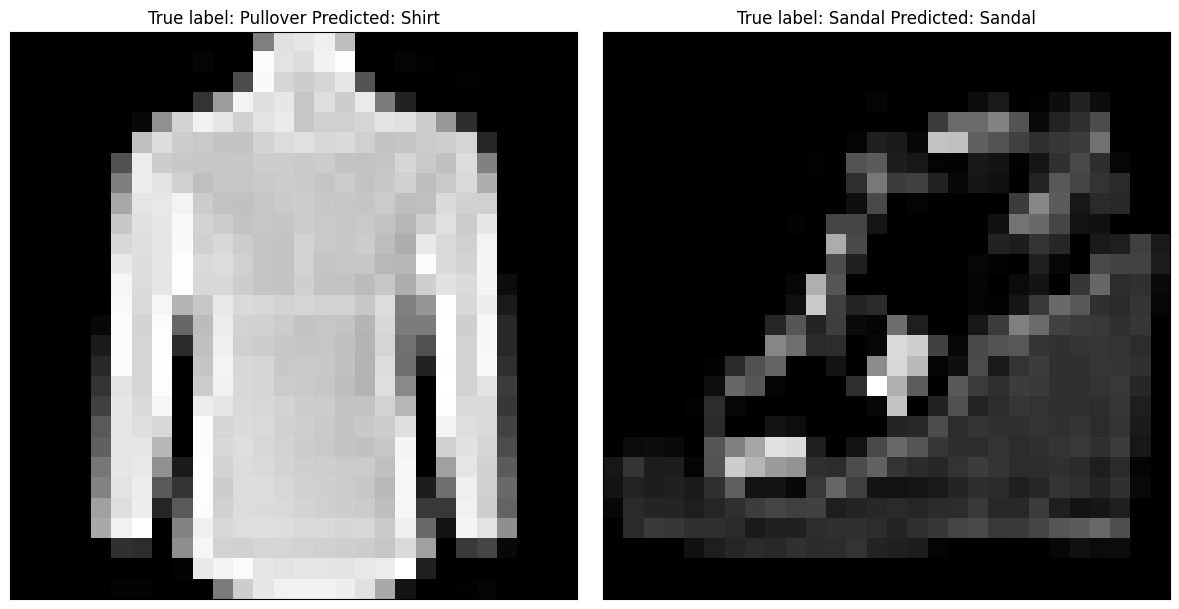

In [59]:
# Extract indices of correctly classified examples
correctly_classified_idx = np.where(p_test == y_test)[0]

# Randomly select a misclassified example
i_misclassified = np.random.choice(misclassified_idx)
plt.figure(figsize=(12, 6))

# Plot misclassified example
plt.subplot(1, 2, 1)
plt.imshow(x_test[i_misclassified], cmap='gray')
plt.title(f"True label: {fashion_mnist_labels[y_test[i_misclassified]]} Predicted: {fashion_mnist_labels[p_test[i_misclassified]]}")
plt.xticks([])
plt.yticks([])

# Randomly select a correctly classified example
i_correctly_classified = np.random.choice(correctly_classified_idx)

# Plot correctly classified example
plt.subplot(1, 2, 2)
plt.imshow(x_test[i_correctly_classified], cmap='gray')
plt.title(f"True label: {fashion_mnist_labels[y_test[i_correctly_classified]]} Predicted: {fashion_mnist_labels[p_test[i_correctly_classified]]}")
plt.xticks([])
plt.yticks([])

plt.tight_layout()
plt.show()